In [1]:
%matplotlib inline


# Plot Fused-gromov-Wasserstein


This example illustrates the computation of FGW for 1D measures[18].

.. [18] Vayer Titouan, Chapel Laetitia, Flamary R{'e}mi, Tavenard Romain
      and Courty Nicolas
    "Optimal Transport for structured data with application on graphs"
    International Conference on Machine Learning (ICML). 2019.




In [2]:
# Author: Titouan Vayer <titouan.vayer@irisa.fr>
#
# License: MIT License

import matplotlib.pyplot as pl
import numpy as np
import ot
from ot.gromov import gromov_wasserstein, fused_gromov_wasserstein

Generate data
---------



In [3]:
#%% parameters
# We create two 1D random measures
n = 20  # number of points in the first distribution
n2 = 30  # number of points in the second distribution
sig = 1  # std of first distribution
sig2 = 0.1  # std of second distribution

np.random.seed(0)

phi = np.arange(n)[:, None]
xs = phi + sig * np.random.randn(n, 1)
ys = np.vstack((np.ones((n // 2, 1)), 0 * np.ones((n // 2, 1)))) + sig2 * np.random.randn(n, 1)

phi2 = np.arange(n2)[:, None]
xt = phi2 + sig * np.random.randn(n2, 1)
yt = np.vstack((np.ones((n2 // 2, 1)), 0 * np.ones((n2 // 2, 1)))) + sig2 * np.random.randn(n2, 1)
yt = yt[::-1, :]

p = ot.unif(n)
q = ot.unif(n2)

Plot data
---------



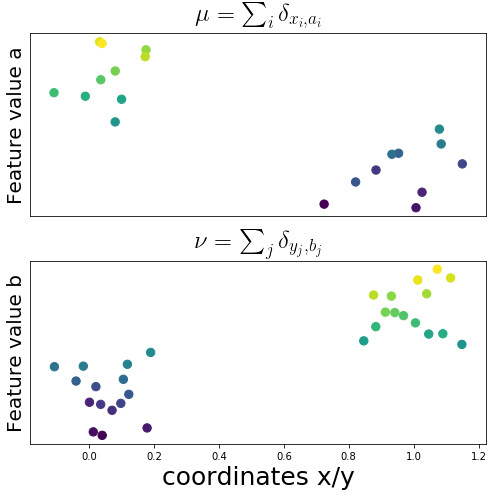

In [4]:
#%% plot the distributions

pl.close(10)
pl.figure(10, (7, 7))

pl.subplot(2, 1, 1)

pl.scatter(ys, xs, c=phi, s=70)
pl.ylabel('Feature value a', fontsize=20)
pl.title('$\mu=\sum_i \delta_{x_i,a_i}$', fontsize=25, usetex=True, y=1)
pl.xticks(())
pl.yticks(())
pl.subplot(2, 1, 2)
pl.scatter(yt, xt, c=phi2, s=70)
pl.xlabel('coordinates x/y', fontsize=25)
pl.ylabel('Feature value b', fontsize=20)
pl.title('$\\nu=\sum_j \delta_{y_j,b_j}$', fontsize=25, usetex=True, y=1)
pl.yticks(())
pl.tight_layout()
pl.show()

Create structure matrices and across-feature distance matrix
---------



In [5]:
#%% Structure matrices and across-features distance matrix
C1 = ot.dist(xs)
C2 = ot.dist(xt)
M = ot.dist(ys, yt)
w1 = ot.unif(C1.shape[0])
w2 = ot.unif(C2.shape[0])
Got = ot.emd([], [], M)

Plot matrices
---------



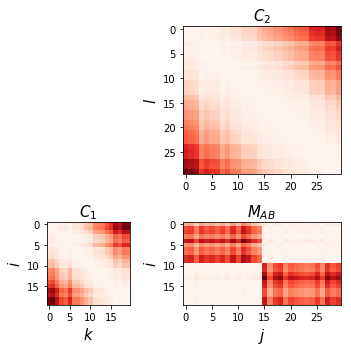

In [6]:
#%%
cmap = 'Reds'
pl.close(10)
pl.figure(10, (5, 5))
fs = 15
l_x = [0, 5, 10, 15]
l_y = [0, 5, 10, 15, 20, 25]
gs = pl.GridSpec(5, 5)

ax1 = pl.subplot(gs[3:, :2])

pl.imshow(C1, cmap=cmap, interpolation='nearest')
pl.title("$C_1$", fontsize=fs)
pl.xlabel("$k$", fontsize=fs)
pl.ylabel("$i$", fontsize=fs)
pl.xticks(l_x)
pl.yticks(l_x)

ax2 = pl.subplot(gs[:3, 2:])

pl.imshow(C2, cmap=cmap, interpolation='nearest')
pl.title("$C_2$", fontsize=fs)
pl.ylabel("$l$", fontsize=fs)
#pl.ylabel("$l$",fontsize=fs)
pl.xticks(())
pl.yticks(l_y)
ax2.set_aspect('auto')

ax3 = pl.subplot(gs[3:, 2:], sharex=ax2, sharey=ax1)
pl.imshow(M, cmap=cmap, interpolation='nearest')
pl.yticks(l_x)
pl.xticks(l_y)
pl.ylabel("$i$", fontsize=fs)
pl.title("$M_{AB}$", fontsize=fs)
pl.xlabel("$j$", fontsize=fs)
pl.tight_layout()
ax3.set_aspect('auto')
pl.show()

Compute FGW/GW
---------



In [7]:
#%% Computing FGW and GW
alpha = 1e-3

ot.tic()
Gwg, logw = fused_gromov_wasserstein(M, C1, C2, p, q, loss_fun='square_loss', alpha=alpha, verbose=True, log=True)
ot.toc()

#%reload_ext WGW
Gg, log = gromov_wasserstein(C1, C2, p, q, loss_fun='square_loss', verbose=True, log=True)

It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|4.734462e+01|0.000000e+00|0.000000e+00
    1|2.508258e+01|8.875498e-01|2.226204e+01
    2|2.189329e+01|1.456747e-01|3.189297e+00
    3|2.189329e+01|0.000000e+00|0.000000e+00
Elapsed time : 0.005539894104003906 s
It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|4.683978e+04|0.000000e+00|0.000000e+00
    1|3.860061e+04|2.134468e-01|8.239175e+03
    2|2.182948e+04|7.682787e-01|1.677113e+04
    3|2.182948e+04|0.000000e+00|0.000000e+00


Visualize transport matrices
---------



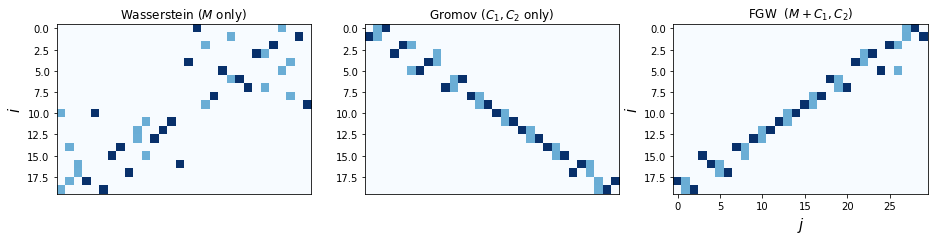

In [8]:
#%% visu OT matrix
cmap = 'Blues'
fs = 15
pl.figure(2, (13, 5))
pl.clf()
pl.subplot(1, 3, 1)
pl.imshow(Got, cmap=cmap, interpolation='nearest')
#pl.xlabel("$y$",fontsize=fs)
pl.ylabel("$i$", fontsize=fs)
pl.xticks(())

pl.title('Wasserstein ($M$ only)')

pl.subplot(1, 3, 2)
pl.imshow(Gg, cmap=cmap, interpolation='nearest')
pl.title('Gromov ($C_1,C_2$ only)')
pl.xticks(())
pl.subplot(1, 3, 3)
pl.imshow(Gwg, cmap=cmap, interpolation='nearest')
pl.title('FGW  ($M+C_1,C_2$)')

pl.xlabel("$j$", fontsize=fs)
pl.ylabel("$i$", fontsize=fs)

pl.tight_layout()
pl.show()